Dataset

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

In [15]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [16]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

9


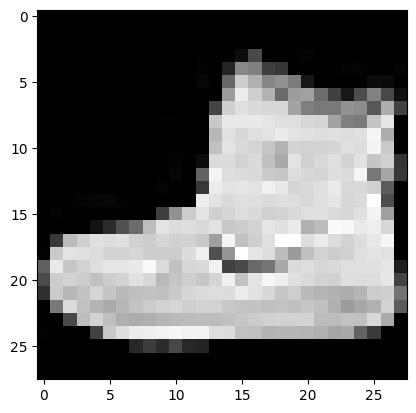

In [17]:
import matplotlib.pyplot as plt

idx=0
plt.imshow(x_train[idx], cmap='gray')
print(y_train[idx])

In [18]:
class_names = [
    "T-shirt/top",  # 0
    "Trouser",      # 1
    "Pullover",     # 2
    "Dress",        # 3
    "Coat",         # 4
    "Sandal",       # 5
    "Shirt",        # 6
    "Sneaker",      # 7
    "Bag",          # 8
    "Ankle boot"    # 9
]

Preprocessing

In [19]:
import numpy as np

np.min(x_train), np.max(x_train)

(np.uint8(0), np.uint8(255))

In [20]:
x_train = x_train / 255
x_test = x_test / 255

In [21]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Model Definition

In [22]:
#Dense layers
model= keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 400,906 (1.53 MB)

 Trainable params: 400,906 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
hist = model.fit(x_train, y_train, epochs=500, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6799 - loss: 0.9235 - val_accuracy: 0.8375 - val_loss: 0.4446
Epoch 2/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8523 - loss: 0.4117 - val_accuracy: 0.8527 - val_loss: 0.4036
Epoch 3/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8762 - loss: 0.3409 - val_accuracy: 0.8604 - val_loss: 0.3863
Epoch 4/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8824 - loss: 0.3202 - val_accuracy: 0.8665 - val_loss: 0.3637
Epoch 5/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8888 - loss: 0.2980 - val_accuracy: 0.8773 - val_loss: 0.3381
Epoch 6/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8976 - loss: 0.2764 - val_accuracy: 0.8740 - val_loss: 0.3466
Epoch 7/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8998 - loss: 0.2679 - val_accuracy: 0.8816 - val_loss: 0.3288
Epoch 8/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9060 - loss: 0.2473 - val_acc

CNN Model

In [26]:
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(64, (5,5), activation='relu', input_shape=(28,28,1), padding='same'))
model1.add(keras.layers.MaxPool2D())
model1.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model1.add(keras.layers.AveragePooling2D((3,3)))
model1.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model1.add(keras.layers.MaxPool2D())
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,418 (1005.54 KB)

 Trainable params: 257,418 (1005.54 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
hist1 = model1.fit(x_train, y_train, epochs=500, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.5478 - loss: 1.3263 - val_accuracy: 0.7421 - val_loss: 0.6348
Epoch 2/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7891 - loss: 0.5623 - val_accuracy: 0.7842 - val_loss: 0.5790
Epoch 3/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8208 - loss: 0.4908 - val_accuracy: 0.8340 - val_loss: 0.4659
Epoch 4/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8399 - loss: 0.4351 - val_accuracy: 0.8548 - val_loss: 0.4128
Epoch 5/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8557 - loss: 0.3964 - val_accuracy: 0.8602 - val_loss: 0.3833
Epoch 6/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.8672 - loss: 0.3598 - val_accuracy: 0.8531 - val_loss: 0.3921
Epoch 7/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8713 - loss: 0.3469 - val_accuracy: 0.8715 - val_loss: 0.3519
Epoch 8/500
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8817 - loss: 0.3227 - 

Evaluation

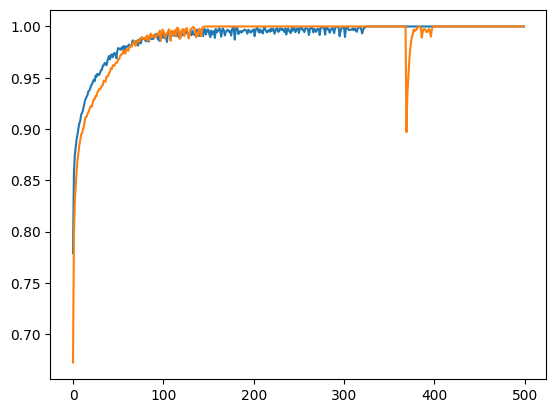

In [33]:
plt.plot(hist.history['accuracy'], label='green')
plt.plot(hist1.history['accuracy'], label='blue')

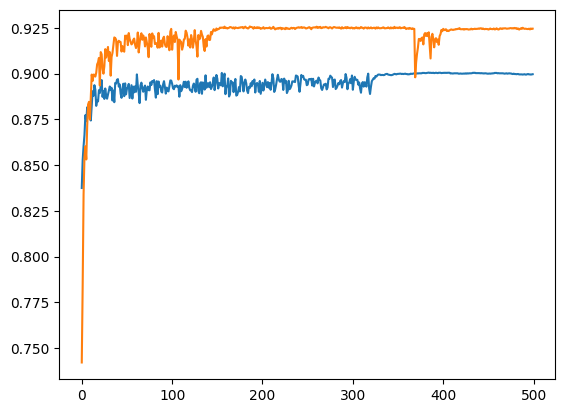

In [34]:
plt.plot(hist.history['val_accuracy'], label='green')
plt.plot(hist1.history['val_accuracy'], label='blue')

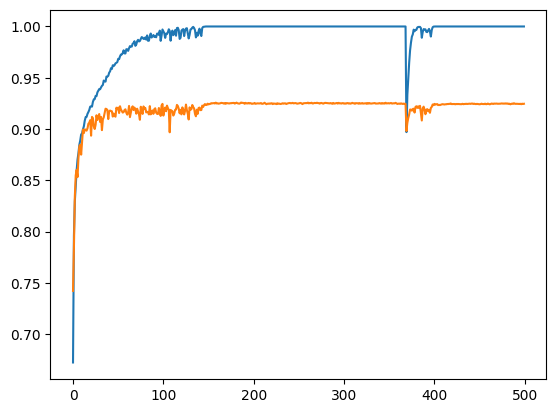

In [35]:
plt.plot(hist1.history['accuracy'], label='blue')
plt.plot(hist1.history['val_accuracy'], label='red')

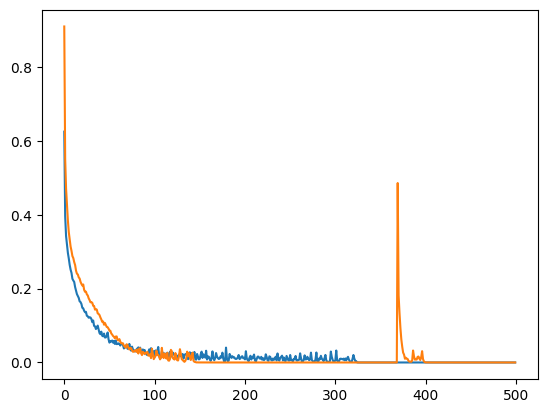

In [36]:
plt.plot(hist.history['loss'], label='green')
plt.plot(hist1.history['loss'], label='blue')